# Objective: Learn to do clustering and noise reduction in data using PCA 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## PCA using SVD

In [4]:
def pca(X):
    U, S, PTrans = svd(X, full_matrices=False)
    Sigma = np.diag(S)
    T=np.dot(U,Sigma)
    P=PTrans.T
    return T, Sigma, P #Score, Variace, Loadings

In [6]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

In [8]:
# Find out the original dimension of the data
X=digits.data
y=digits.target
print("Shape of X",X.shape)
print("Shape of y", y.shape)

Shape of X (1797, 64)
Shape of y (1797,)


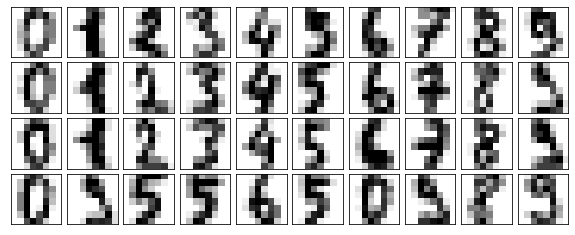

In [10]:
#Visualize the original data
plot_digits(X)

### Task 1: Dimensionality reduction: Conduct PCA on the the matrix $X$ to find out the dimension required to capture 80% of the variance

In [13]:
import seaborn as sns

T, S, P = pca(X)

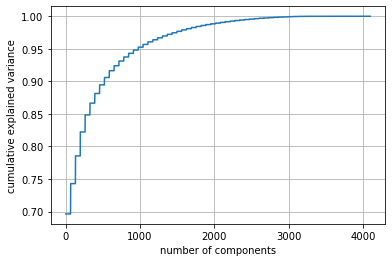

In [15]:
SS = S
explained_variance = (SS ** 2) / 4
explained_variance_ratio = (explained_variance / explained_variance.sum())
plt.plot(np.cumsum(explained_variance_ratio))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

###  Task 2: Clustering: Project the original data matrix X on the first two PCs and draw the scalar plot 

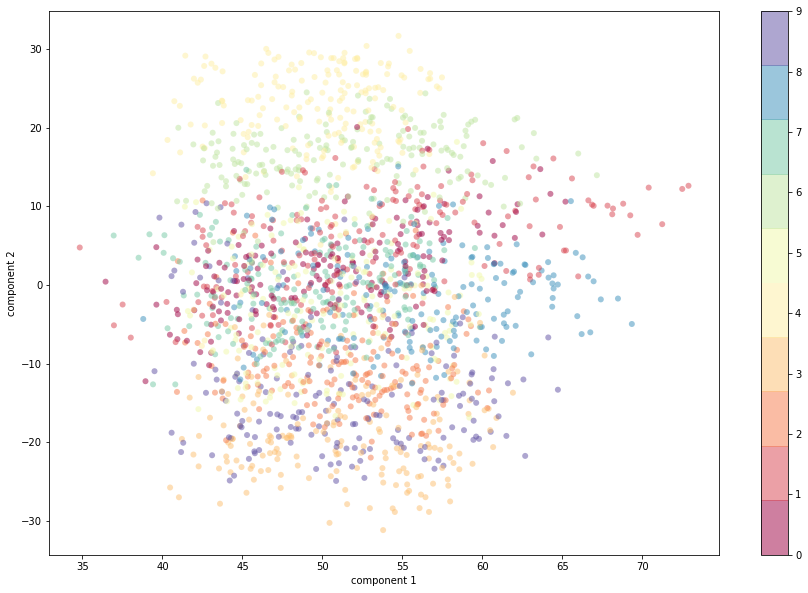

In [20]:
t1 = T[:, 0]
t2 = T[:, 1]
plt.figure(figsize=(15,10))
plt.scatter(t1, t2,
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Task 3: Denoising: Remove noise from the noisy data

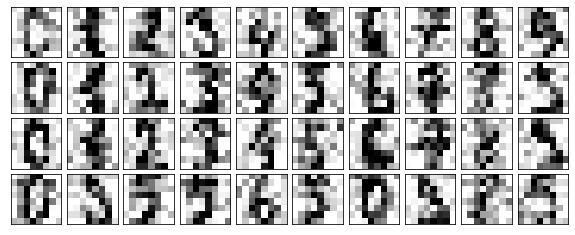

In [21]:
# Adding noise to the original data
X=digits.data
y=digits.target
np.random.seed(42)
noisy = np.random.normal(X, 4)
plot_digits(noisy)

Tips: 

* Decompose the noisy data using PCA 
* Reconstruct the data using just a few dominant components.For eg. check the variance plot 

Since the nature of the noise is more or less similar across all the digits, they are not the fearues with enough variance to discriminate between the digits. 

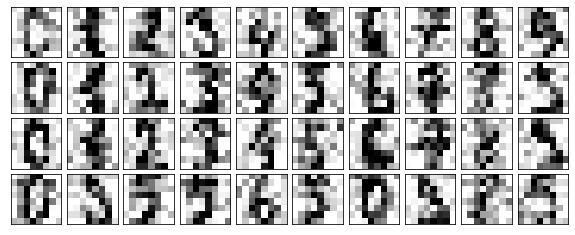

In [22]:
T, S, P = pca(noisy)

n_comps = None
X_denoised = np.dot(noisy, P)
plot_digits(X_denoised @ P.T)

### Task 4: Study the impact of normalization of the dataset before conducting PCA. Discuss if it is critical to normalize this particular data compared to the dataset in other notebooks

# All the above excercise can be done using the SKLEAR library as follows

In [6]:
from sklearn.decomposition import PCA
X=digits.data
y=digits.target

(1797, 64)
(1797, 2)


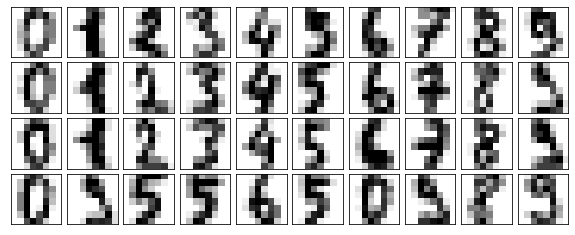

In [7]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plot_digits(digits.data)

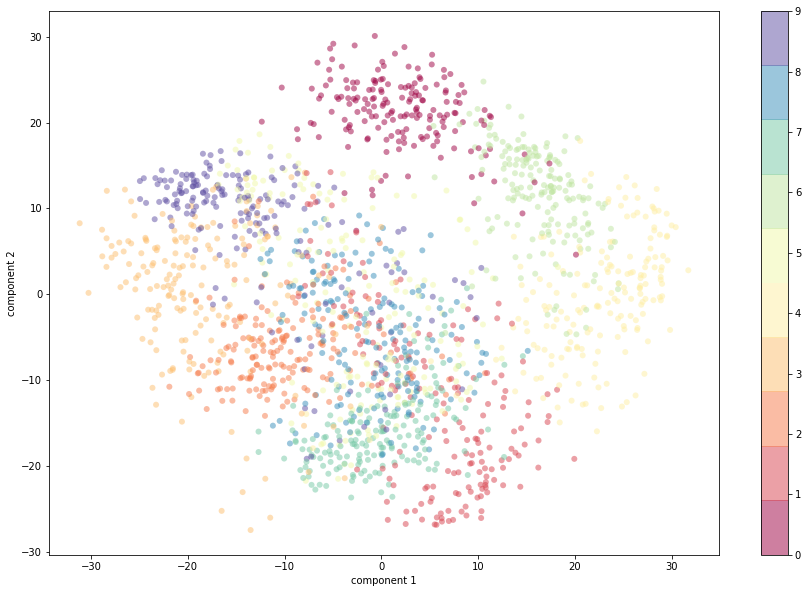

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

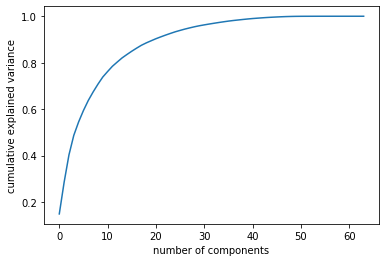

In [9]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

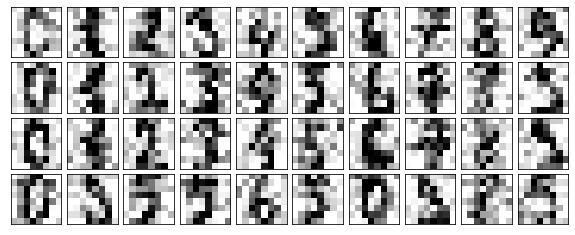

In [10]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


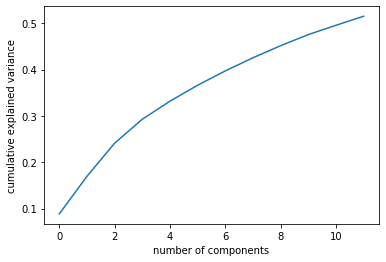

In [11]:
pca = PCA(0.50).fit(noisy) # 50% of the variance amounts to 12 principal components.
pca.n_components_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

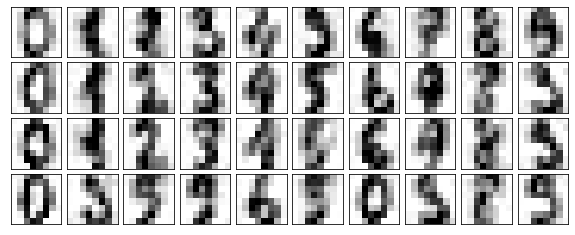

In [12]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)